In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import shapiro

from warnings import simplefilter
simplefilter("ignore")

# Control_Group

In [21]:
# Load the dataset
control = pd.read_csv('/Users/suyeonkim/Documents/IAA/취준/Resume/ncsu format/wells fargo referred/side project/control_group.csv')

# Make the columns list by spliting with ;
columns_list = control.columns[0].split(';')

#Make it as a dataframe, splitting with ;
data = list(control["Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase"].apply(lambda x: x.split(';')))
control_group = pd.DataFrame(data, columns=columns_list)

control_group.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [22]:
# Basic Information
control_group.describe()

# Only 30 rows and all of them are control campaign.

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30,30,30,30,30,30,30,30,30
unique,1,30,30,30,30,30,30,27,30,29
top,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,1149,1819,766
freq,30,1,1,1,1,1,1,2,1,2


In [23]:
print(control_group.isnull().sum())

# No missing value at all. But there is in the dataset. It's becaues it is not NaN but ' ' blank string.

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [24]:
print(control_group.duplicated().sum())
# No duplicate value at all

0


In [25]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     object
 3   # of Impressions     30 non-null     object
 4   Reach                30 non-null     object
 5   # of Website Clicks  30 non-null     object
 6   # of Searches        30 non-null     object
 7   # of View Content    30 non-null     object
 8   # of Add to Cart     30 non-null     object
 9   # of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [26]:
# Make the right format and Impute N/A
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# date format
control_group['Date'] = pd.to_datetime(control_group['Date'], format='%d.%m.%Y')

# convert blank string to np.nan
cols_to_clean = ['Spend [USD]', '# of Impressions', 'Reach',
                 '# of Website Clicks', '# of Searches',
                 '# of View Content', '# of Add to Cart', '# of Purchase']

for col in cols_to_clean:
    control_group[col] = control_group[col].replace('', np.nan).astype(float)

# Impute with MICE (IterativeImputer)
imp = IterativeImputer(random_state=0)
control_group[cols_to_clean] = imp.fit_transform(control_group[cols_to_clean])


In [27]:
control_group.describe()


,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,109554.646482,88842.990373,5320.797134,2219.740229,1943.636154,1300.000890,522.793422
min,2019-08-01 00:00:00,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,2019-08-08 06:00:00,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5272.457010,2340.000000,1979.500000,1319.513347,506.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,367.334451,21311.713866,21452.630226,1726.803732,851.069246,764.022391,400.371207,181.810508


# Test_Group

In [28]:
# Load the dataset
test = pd.read_csv('/Users/suyeonkim/Documents/IAA/취준/Resume/ncsu format/wells fargo referred/side project/test_group.csv')

# Make the columns list by spliting with ;
columns_list2 = test.columns[0].split(';')

#Make it as a dataframe, splitting with ;
data2 = list(test["Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase"].apply(lambda x: x.split(';')))
test_group = pd.DataFrame(data2, columns=columns_list2)

test_group.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [29]:
# Basic Information
test_group.describe()

# Only 30 rows and all of them are test campaign.

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30,30,30,30,30,30,30,30,30
unique,1,30,30,30,30,30,29,30,30,28
top,Test Campaign,1.08.2019,3008,39550,35820,3038,1995,1069,894,340
freq,30,1,1,1,1,1,2,1,1,2


In [30]:
print(test_group.isnull().sum())

# No missing value at all. But there is in the dataset. It's becaues it is not NaN but ' ' blank string.

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [31]:
print(test_group.duplicated().sum())
# No duplicate value at all

0


In [32]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     object
 3   # of Impressions     30 non-null     object
 4   Reach                30 non-null     object
 5   # of Website Clicks  30 non-null     object
 6   # of Searches        30 non-null     object
 7   # of View Content    30 non-null     object
 8   # of Add to Cart     30 non-null     object
 9   # of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [33]:
# Make the right format and Impute N/A

# date format
test_group['Date'] = pd.to_datetime(test_group['Date'], format='%d.%m.%Y')

# convert blank string to np.nan
cols_to_clean = ['Spend [USD]', '# of Impressions', 'Reach',
                 '# of Website Clicks', '# of Searches',
                 '# of View Content', '# of Add to Cart', '# of Purchase']

for col in cols_to_clean:
    test_group[col] = test_group[col].replace('', np.nan).astype(float)

# Impute with MICE (IterativeImputer)
imp = IterativeImputer(random_state=0)
test_group[cols_to_clean] = imp.fit_transform(test_group[cols_to_clean])


In [34]:
test_group.describe()


,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


# Check the Normality

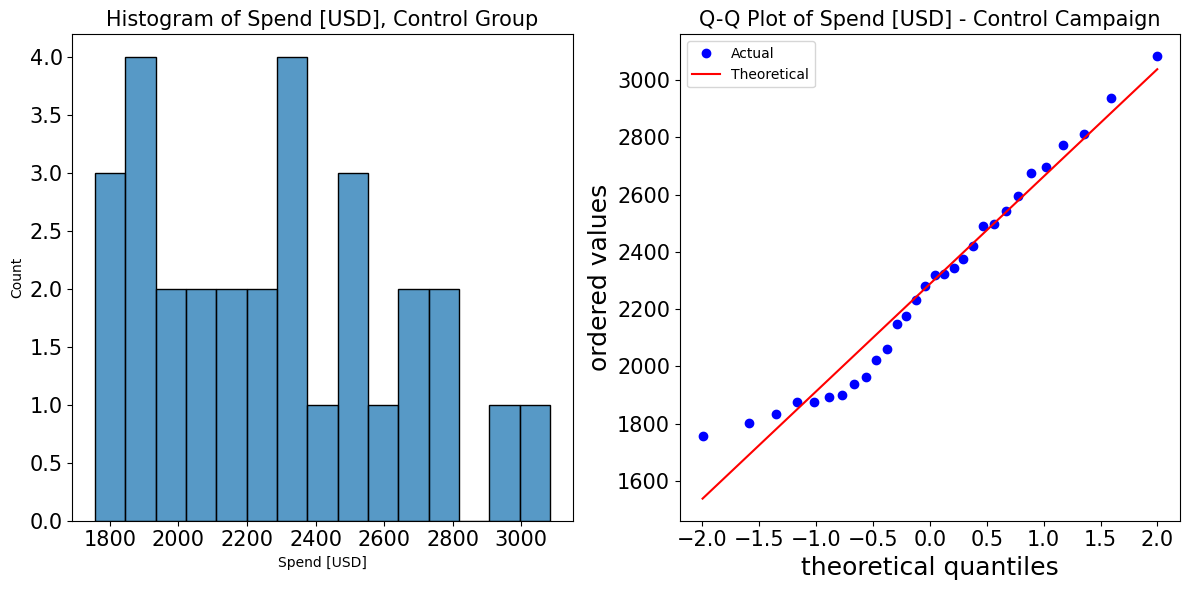

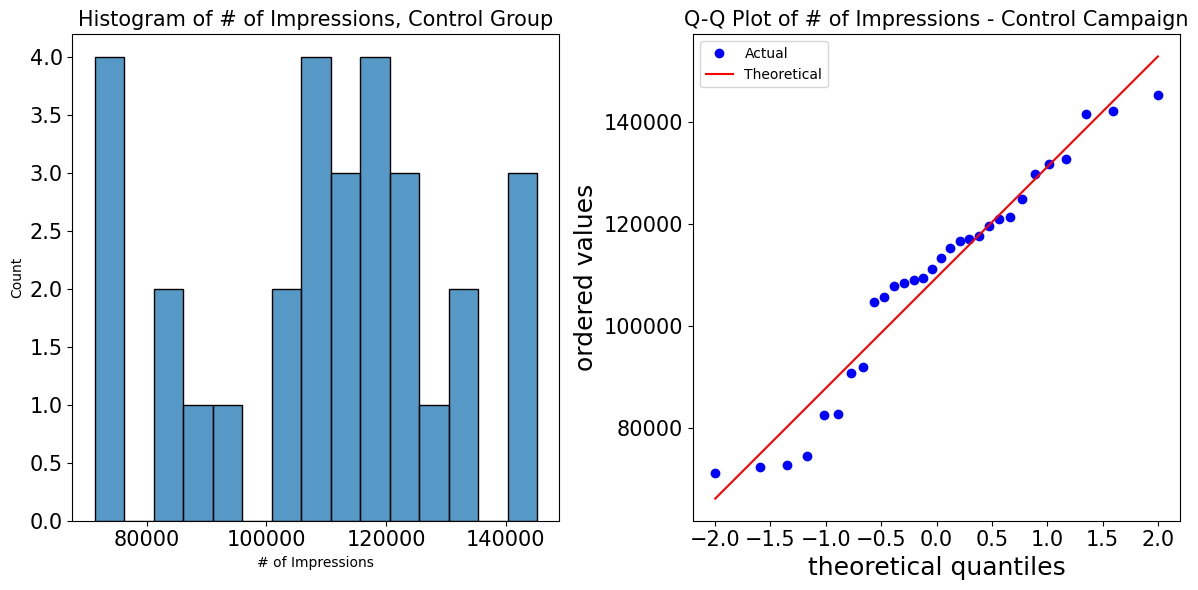

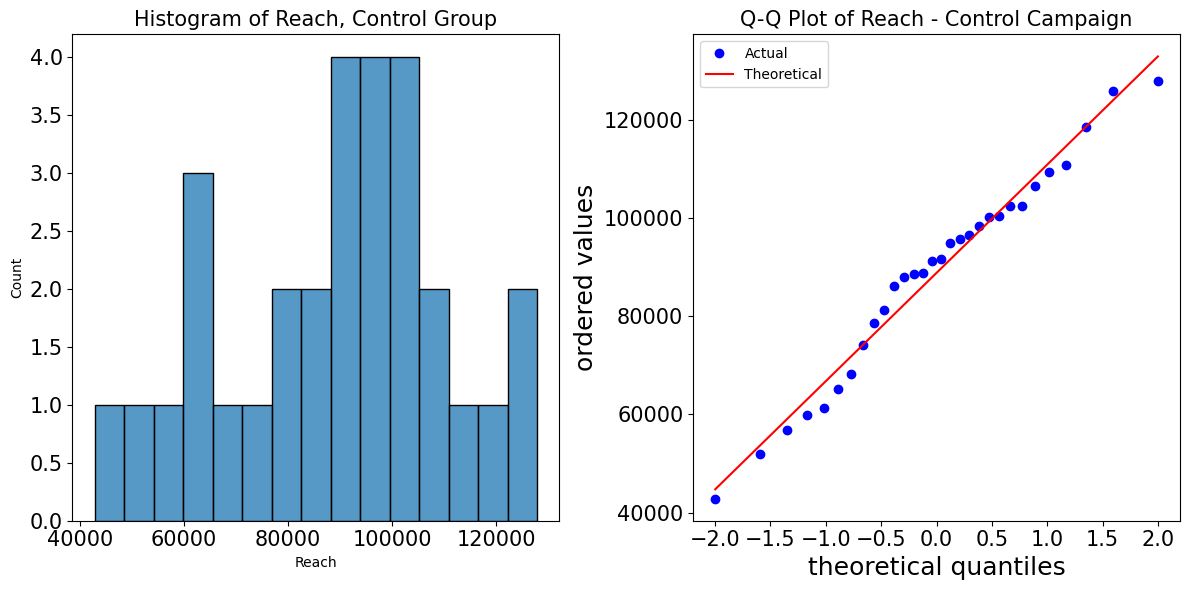

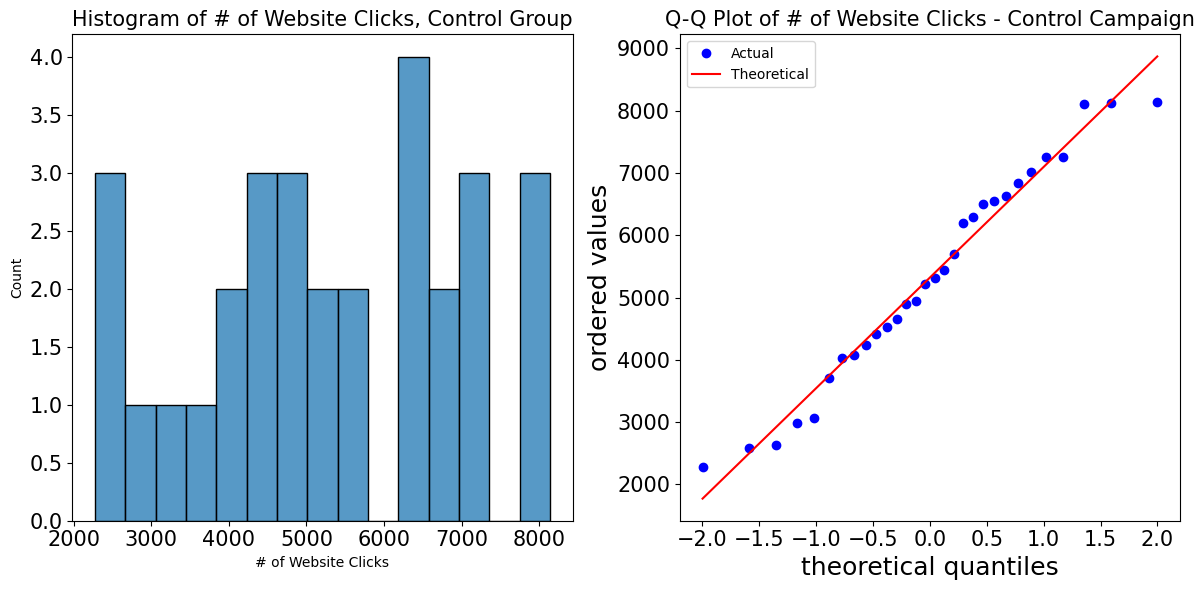

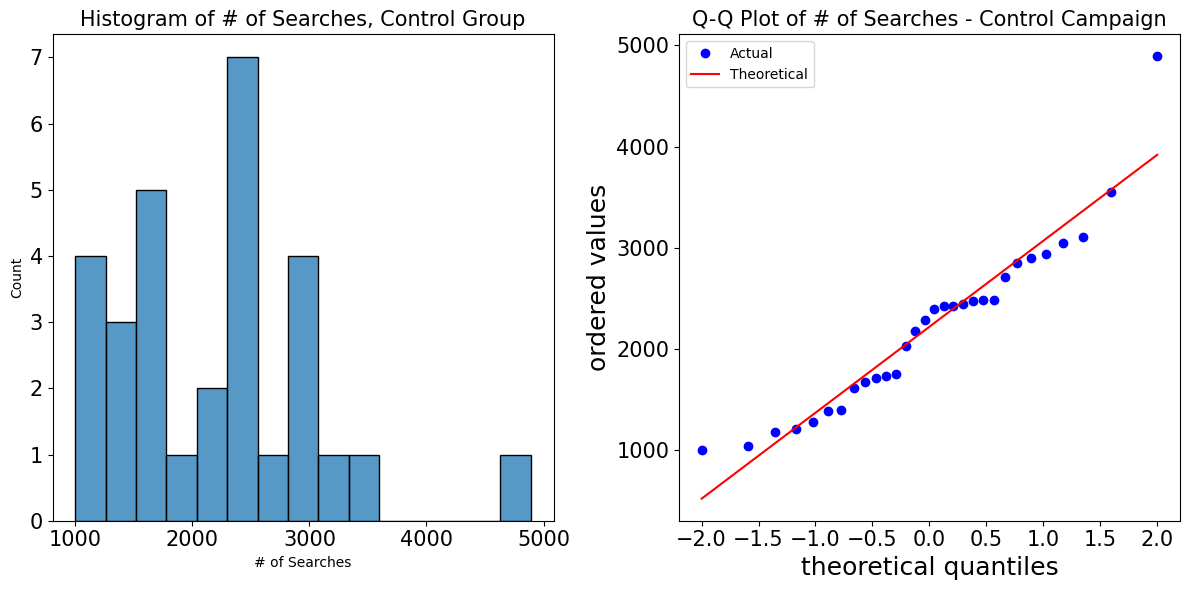

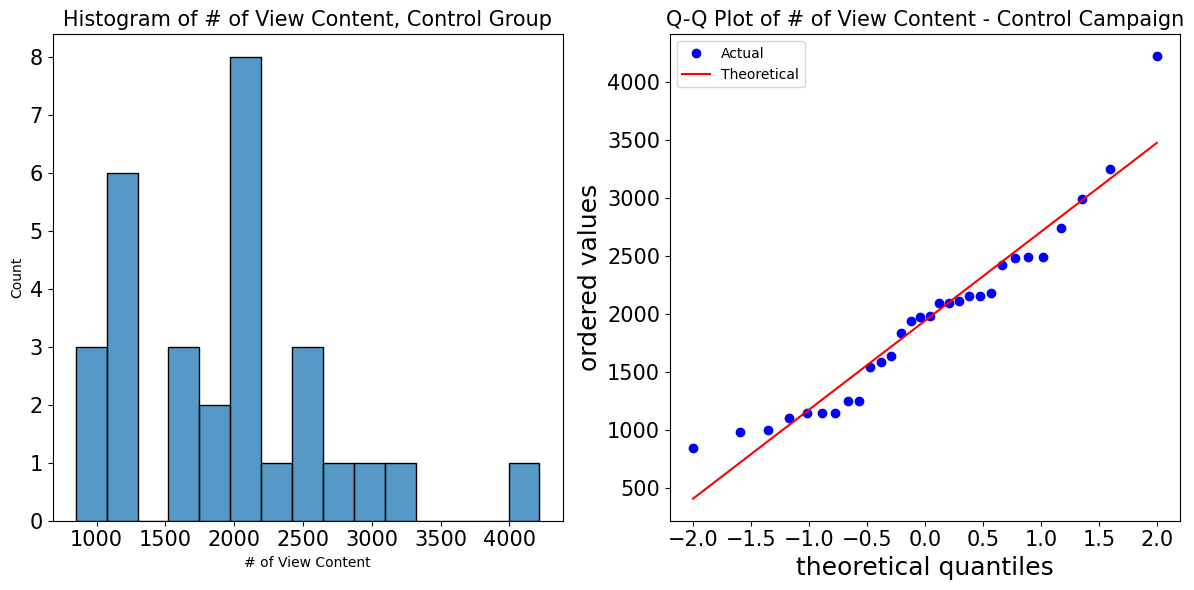

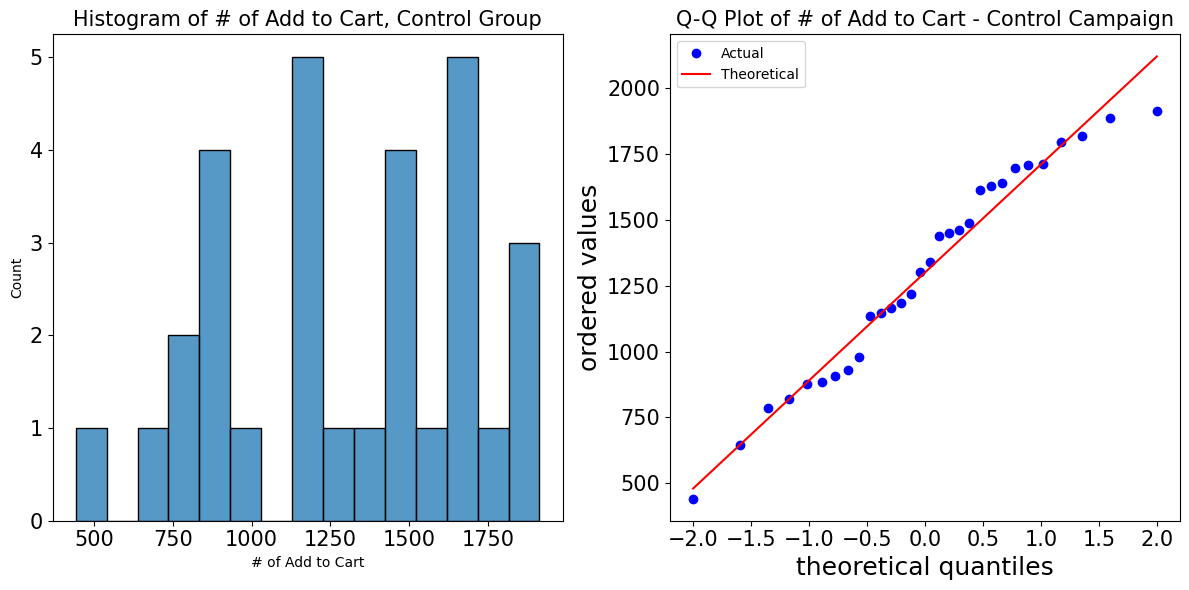

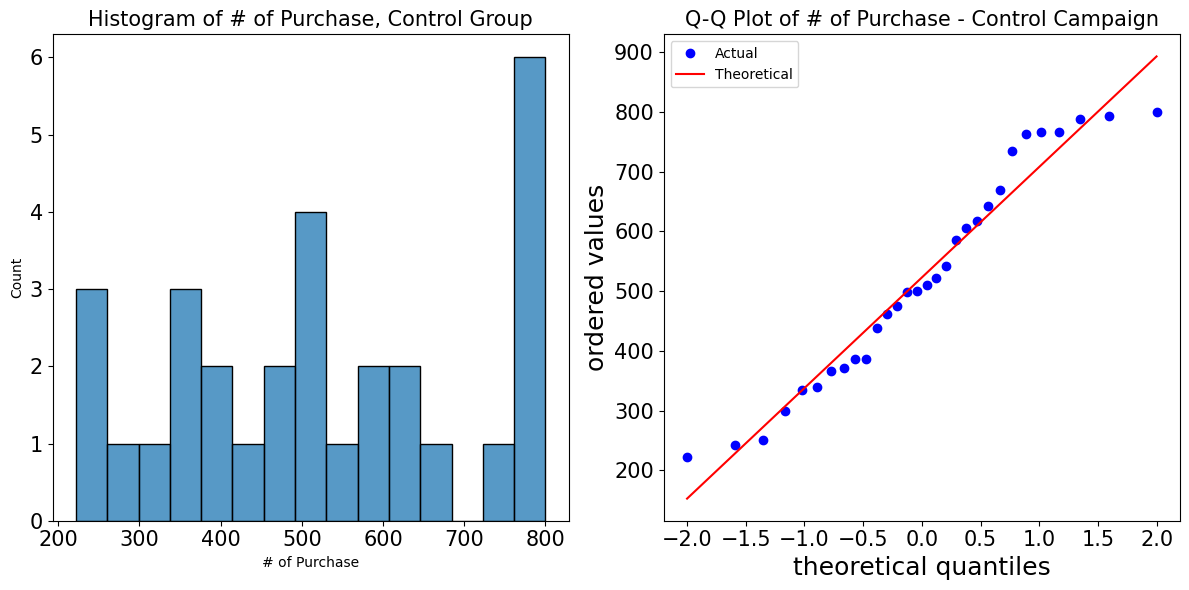

In [35]:
# Define list of metric columns to test
metrics = [
    'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks',
    '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'
]

for metric in metrics:

    fig,axes = plt.subplots(1,2,figsize=(12,6))

    axes[0] = sns.histplot(control_group[metric], bins=15, ax=axes[0])
    axes[0].xaxis.set_tick_params(labelsize=15)
    axes[0].yaxis.set_tick_params(labelsize=15)
    axes[0].set_title(f"Histogram of {metric}, Control Group",fontsize=15)

    axes[1] = stats.probplot(control_group[metric], dist="norm", plot=plt)
    plt.legend(['Actual','Theoretical'])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("theoretical quantiles", fontsize=18)
    plt.ylabel('ordered values', fontsize=18)
    plt.title(f"Q-Q Plot of {metric} - Control Campaign", fontsize=15)

    plt.tight_layout()            

In [36]:
for metric in metrics:

    print(f'\n{metric}:')

    test_stat, pvalue = shapiro(control_group[metric])
    print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

    test_stat, pvalue = shapiro(test_group[metric])
    print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Spend [USD]:
Test Stat = 0.9551, p-value = 0.2313
Test Stat = 0.9441, p-value = 0.1171

# of Impressions:
Test Stat = 0.9438, p-value = 0.1149
Test Stat = 0.9485, p-value = 0.1537

Reach:
Test Stat = 0.9740, p-value = 0.6545
Test Stat = 0.9324, p-value = 0.0570

# of Website Clicks:
Test Stat = 0.9632, p-value = 0.3731
Test Stat = 0.9062, p-value = 0.0120

# of Searches:
Test Stat = 0.9305, p-value = 0.0507
Test Stat = 0.8964, p-value = 0.0068

# of View Content:
Test Stat = 0.9347, p-value = 0.0654
Test Stat = 0.9403, p-value = 0.0928

# of Add to Cart:
Test Stat = 0.9613, p-value = 0.3340
Test Stat = 0.9236, p-value = 0.0332

# of Purchase:
Test Stat = 0.9433, p-value = 0.1114
Test Stat = 0.9182, p-value = 0.0241


I concluded that the data is not normal so I decided to do the bootstrapping.

In [38]:
import numpy as np
import pandas as pd

def run_bootstrap_ab_test(control_df, test_df, metrics, n_bootstrap=10000):
 
    results = []

    def bootstrap_mean_diff(a, b, n_bootstrap=10000):
        """Generate bootstrap distribution of the difference in means."""
        diffs = []
        for _ in range(n_bootstrap):
            a_sample = np.random.choice(a, size=len(a), replace=True)
            b_sample = np.random.choice(b, size=len(b), replace=True)
            diff = b_sample.mean() - a_sample.mean()
            diffs.append(diff)
        return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

    for metric in metrics:
        # Extract values for control and test groups
        control_vals = np.array(control_df[metric])
        test_vals = np.array(test_df[metric])

        # Run bootstrap sampling
        ci, mean_diff = bootstrap_mean_diff(control_vals, test_vals, n_bootstrap)

        # Determine significance: 95% CI should not include zero
        significant = '✅' if ci[0] > 0 or ci[1] < 0 else '❌'

        # Append result
        results.append({
            'Metric': metric,
            'Mean Difference': round(mean_diff, 2),
            '95% CI': f"[{ci[0]:.2f}, {ci[1]:.2f}]",
            'Significant?': significant
        })

    return pd.DataFrame(results)



# Run the bootstrap A/B test
results_df = run_bootstrap_ab_test(control_group, test_group, metrics)

# Display result
print(results_df)


                Metric  Mean Difference                  95% CI Significant?
0          Spend [USD]           275.12         [95.27, 451.20]            ✅
1     # of Impressions        -34963.08  [-48297.57, -21261.28]            ✅
2                Reach        -35401.65  [-47729.00, -22751.13]            ✅
3  # of Website Clicks           713.83      [-134.23, 1555.45]            ❌
4        # of Searches           198.20       [-132.28, 516.21]            ❌
5    # of View Content           -88.87       [-435.04, 246.44]            ❌
6     # of Add to Cart          -417.56      [-598.13, -231.57]            ✅
7        # of Purchase            -1.60         [-98.70, 96.67]            ❌


In [50]:
for metric in metrics:

    print(f'\n{metric}:')
    print(stats.mannwhitneyu(control_group[metric], test_group[metric]))


Spend [USD]:
MannwhitneyuResult(statistic=257.0, pvalue=0.004427193167173018)

# of Impressions:
MannwhitneyuResult(statistic=721.0, pvalue=6.356042543170036e-05)

Reach:
MannwhitneyuResult(statistic=743.0, pvalue=1.5291673925716366e-05)

# of Website Clicks:
MannwhitneyuResult(statistic=349.0, pvalue=0.13732283484699295)

# of Searches:
MannwhitneyuResult(statistic=357.0, pvalue=0.17144409680149675)

# of View Content:
MannwhitneyuResult(statistic=458.0, pvalue=0.9117053103328743)

# of Add to Cart:
MannwhitneyuResult(statistic=691.0, pvalue=0.0003770395640831686)

# of Purchase:
MannwhitneyuResult(statistic=455.0, pvalue=0.9469515266277105)


### Positive & Statistically Significant: Spend [USD]
### Negative & Statistically Significant: # of Impressions , Reach , # of Add to Cart 
### Not Statistically Significant: # of Website Clicks, # of Searches, # of View Content  ,  # of Purchase  

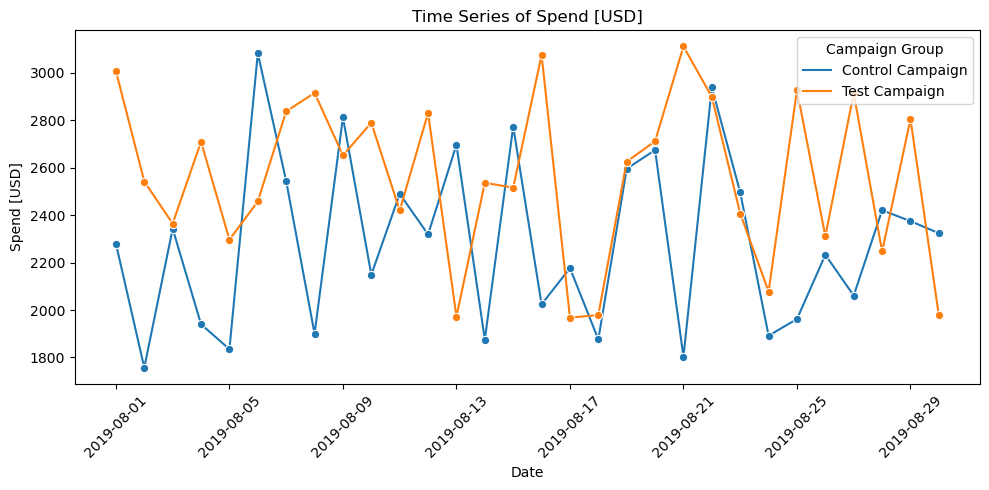

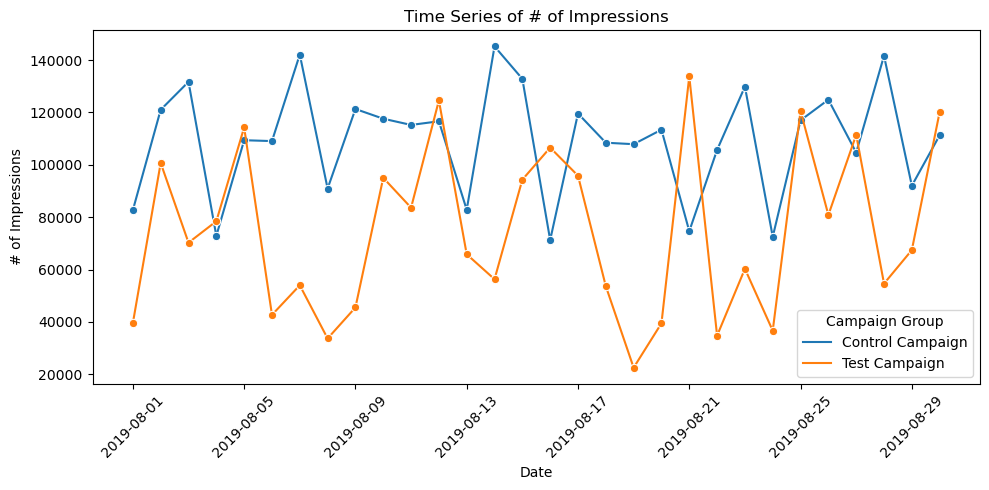

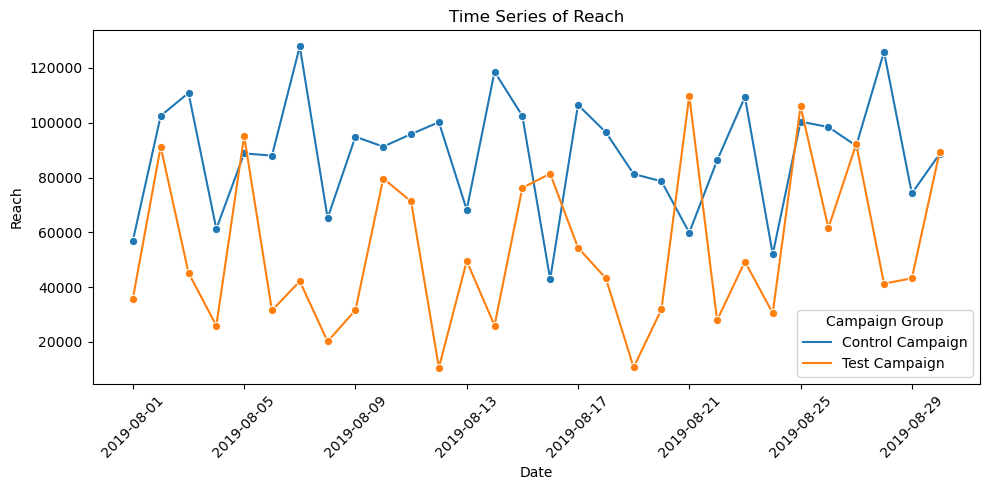

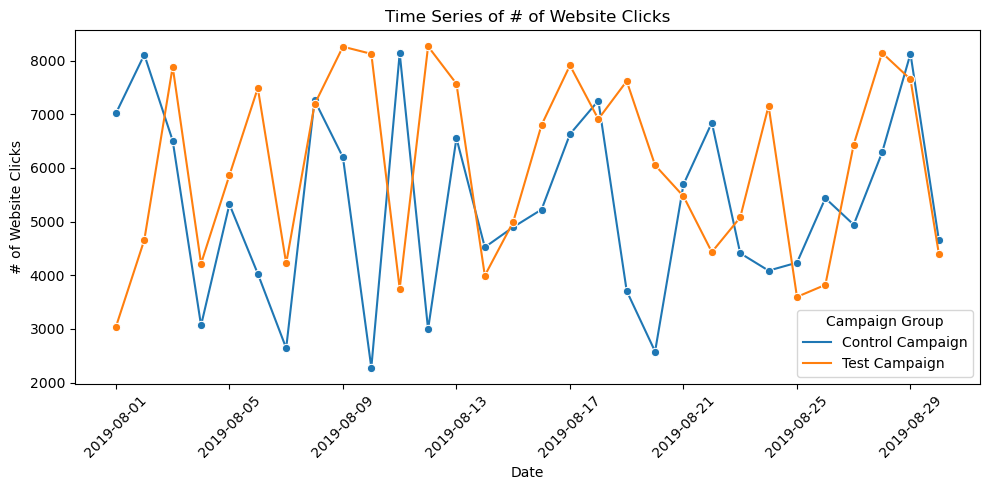

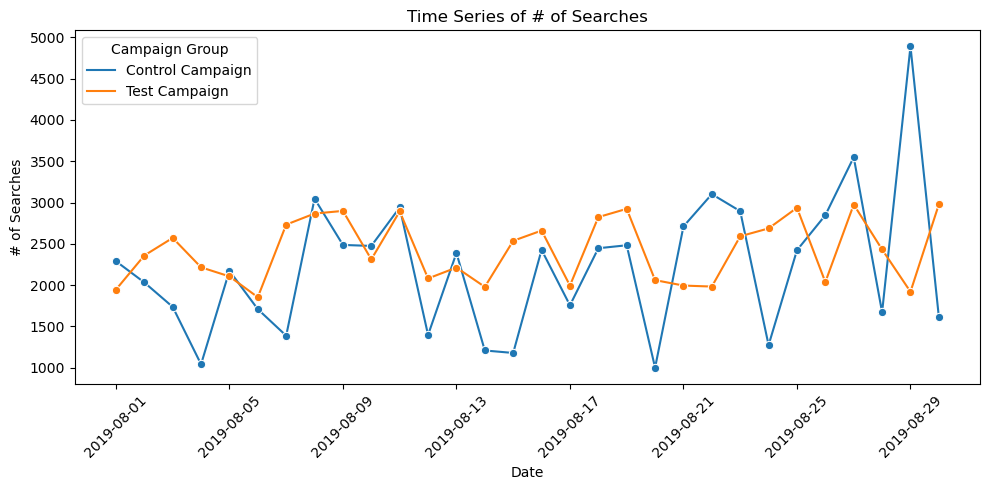

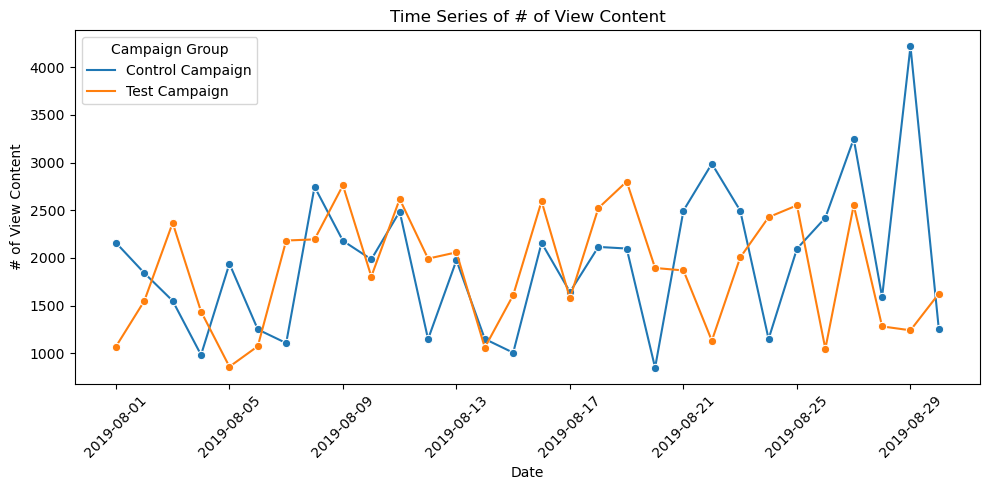

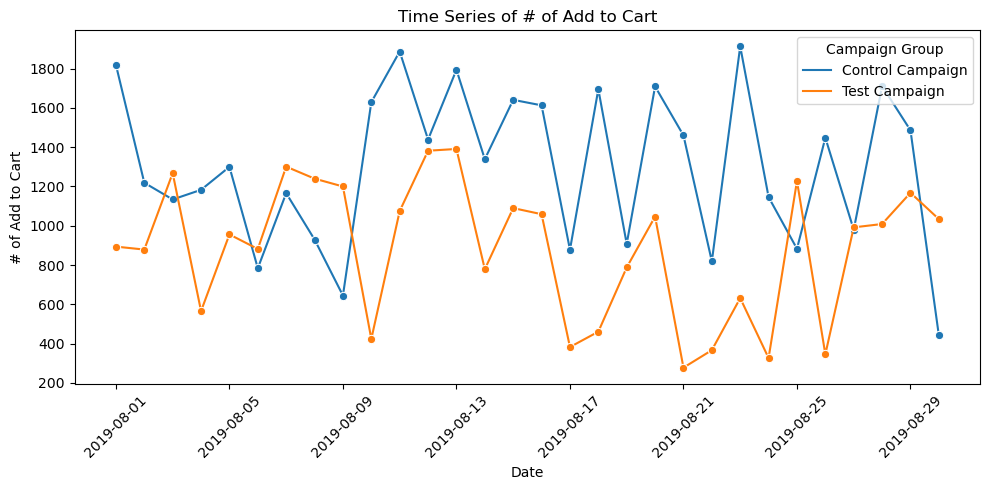

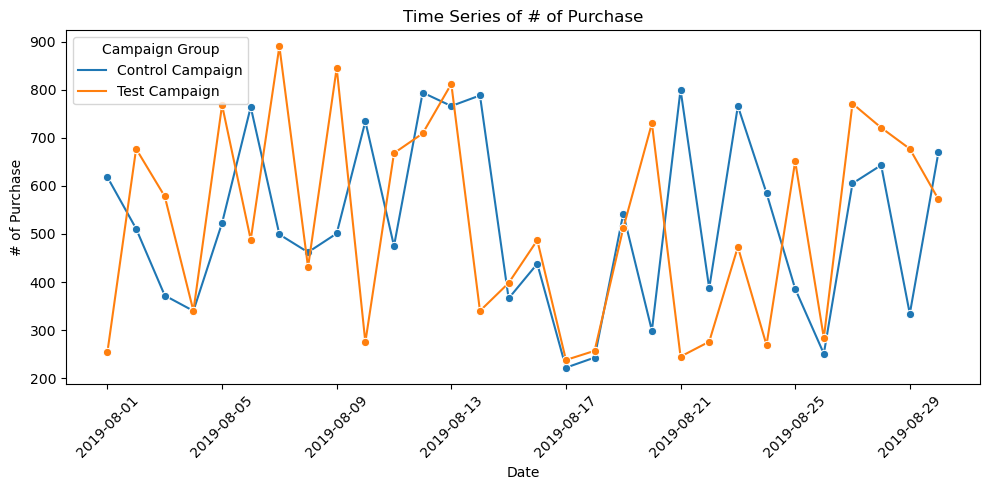

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets
combined_df = pd.concat([control_group, test_group], ignore_index=True)

# List of metrics to plot over time
metrics_to_plot = [
    'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks',
    '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'
]


# Create time series plots
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=combined_df, x='Date', y=metric, hue='Campaign Name', marker='o')
    plt.title(f"Time Series of {metric}")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.legend(title='Campaign Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

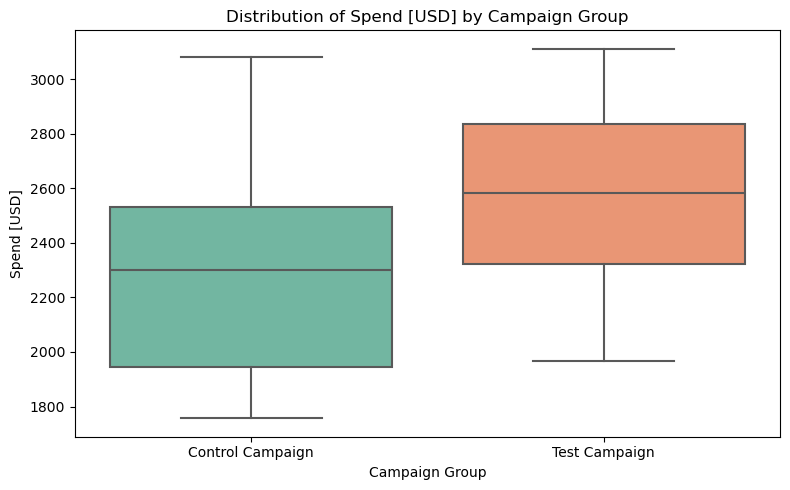

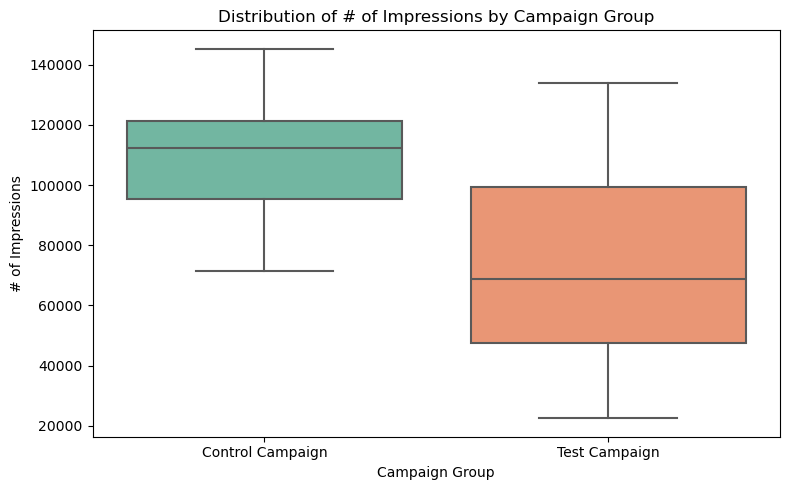

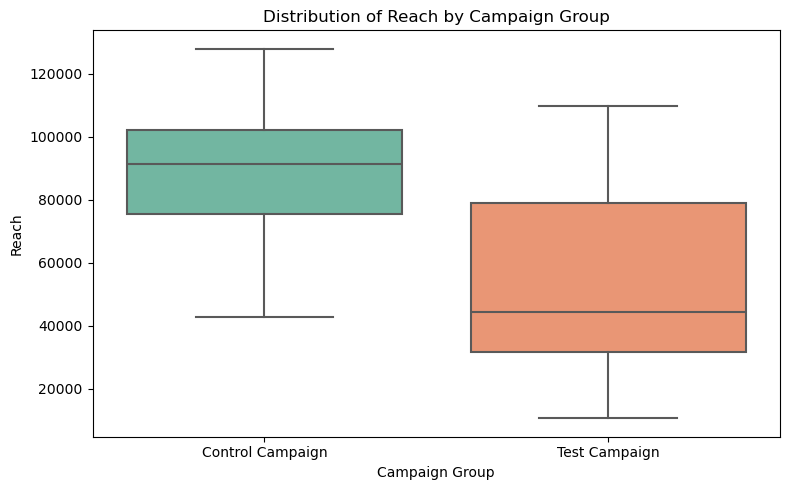

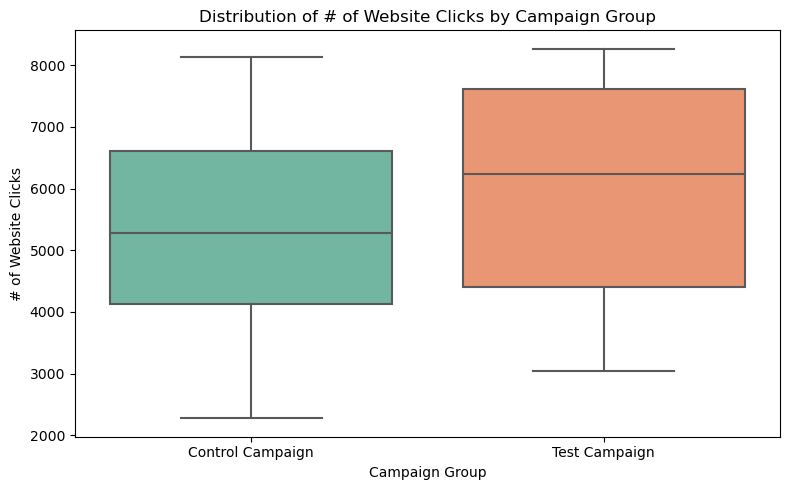

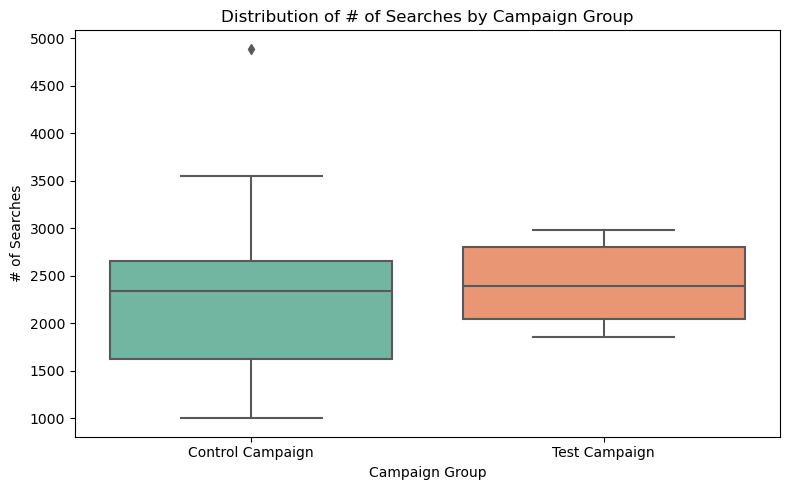

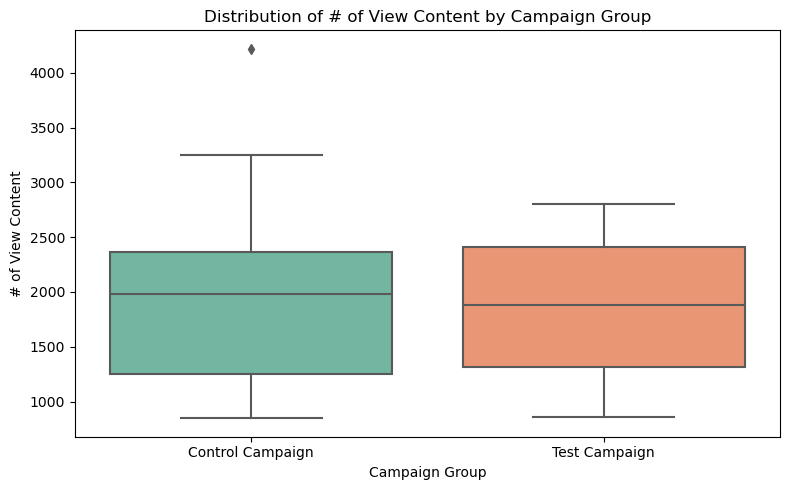

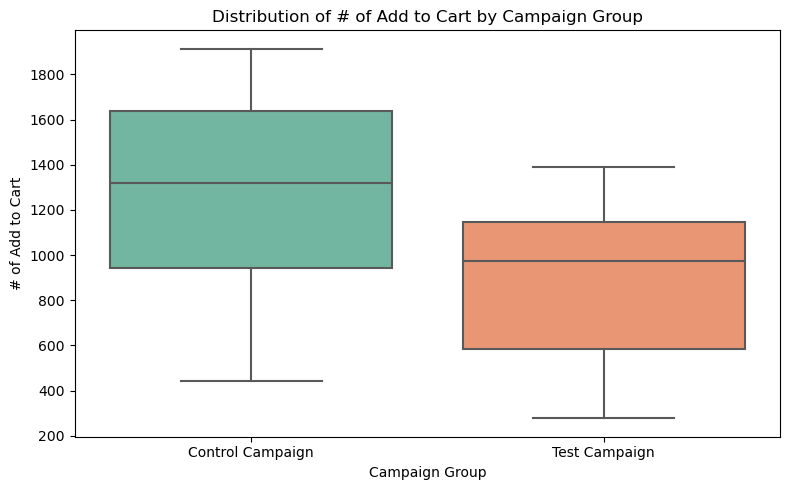

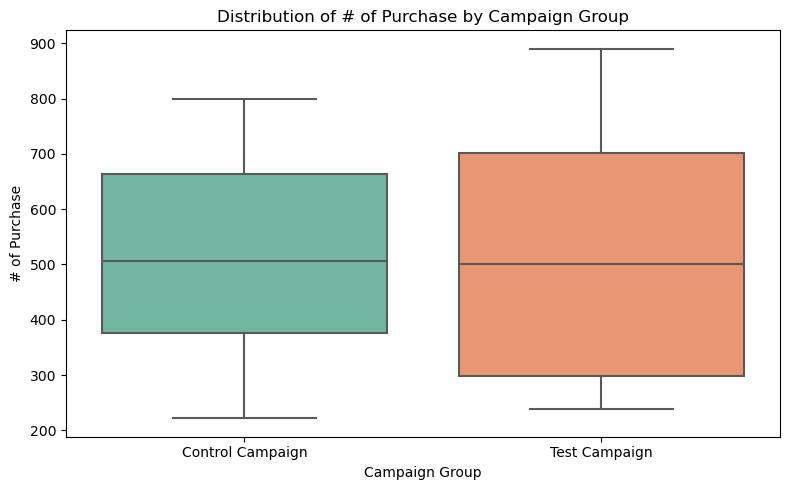

In [40]:
# Create box plots for each metric grouped by campaign name
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined_df, x='Campaign Name', y=metric, palette='Set2')
    plt.title(f"Distribution of {metric} by Campaign Group")
    plt.xlabel("Campaign Group")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


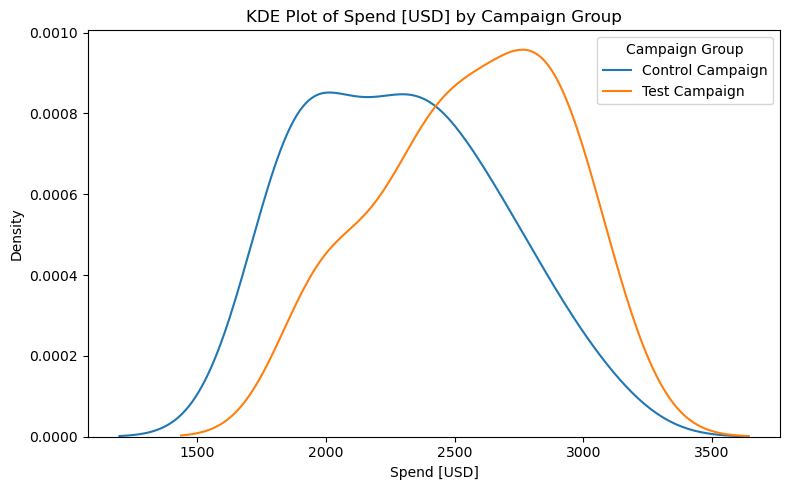

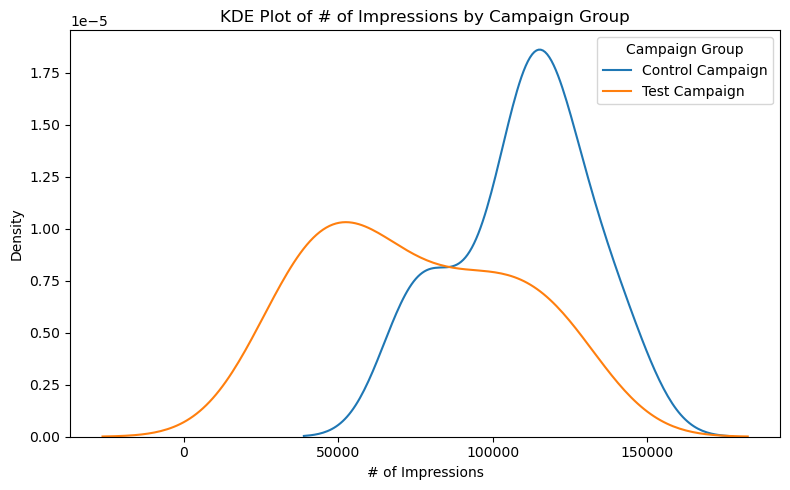

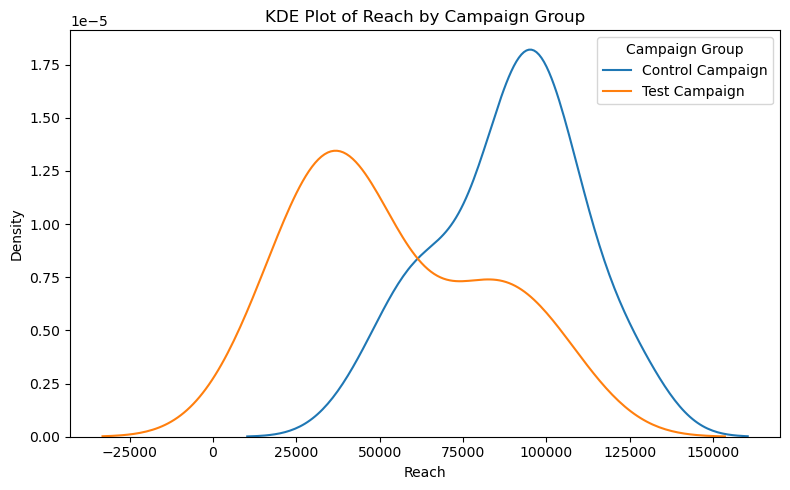

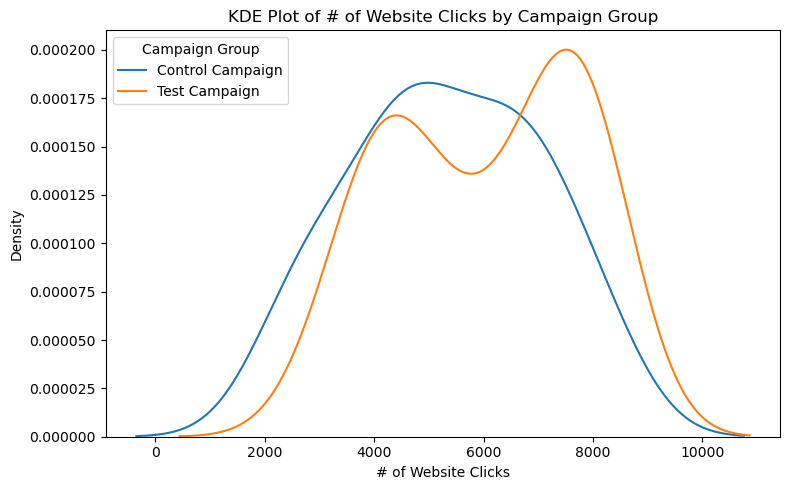

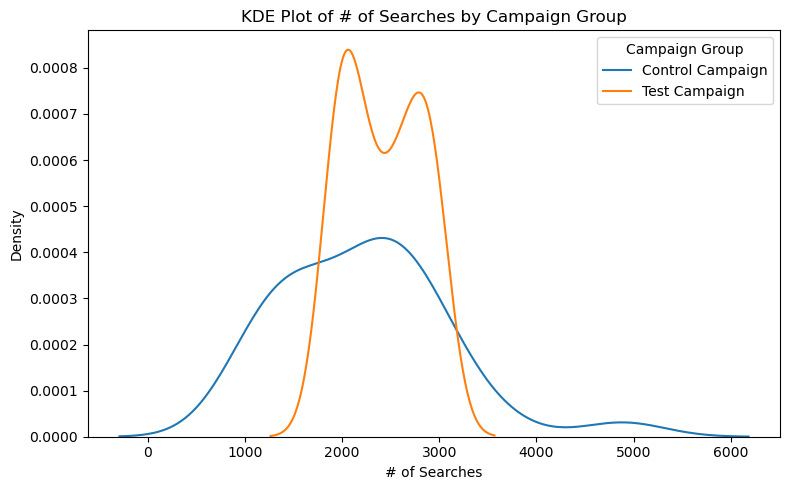

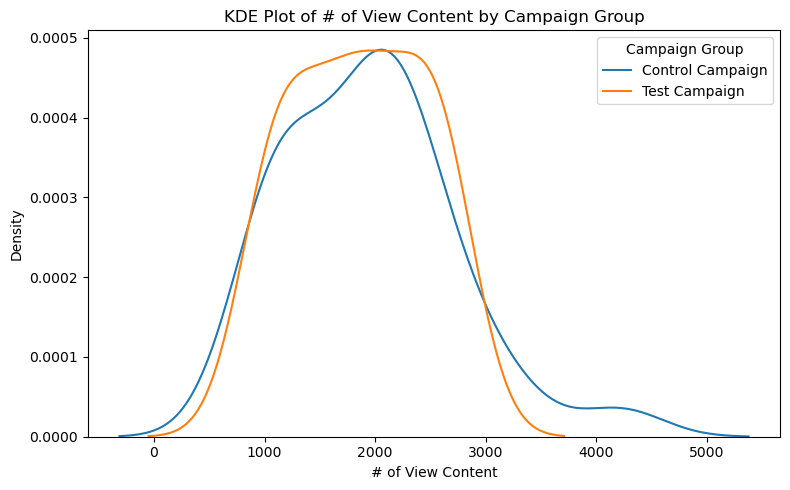

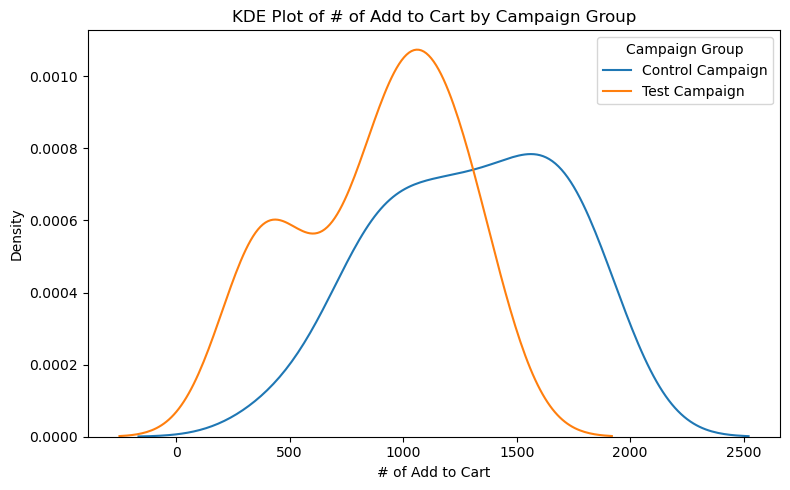

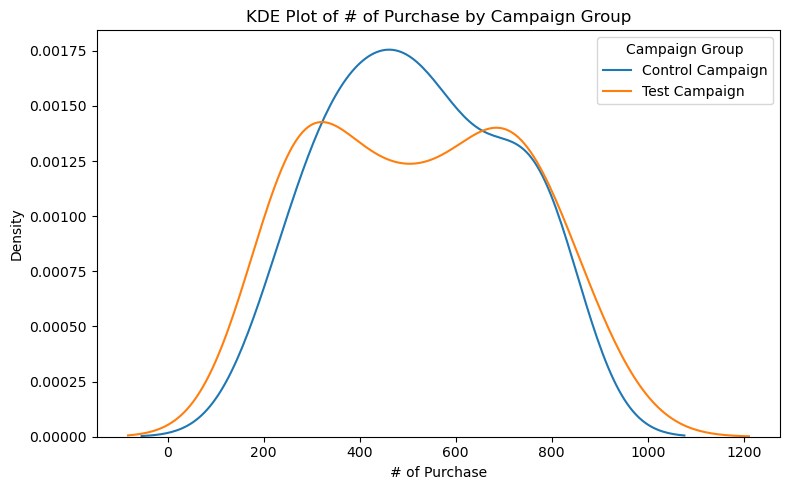

In [41]:
# Fix legend labels manually in KDE plots
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    plot_data = combined_df[[metric, 'Campaign Name']].dropna()

    # Get unique campaign names for plotting and labeling
    for campaign in plot_data['Campaign Name'].unique():
        subset = plot_data[plot_data['Campaign Name'] == campaign]
        sns.kdeplot(data=subset, x=metric, label=campaign, fill=False, common_norm=False)

    plt.title(f"KDE Plot of {metric} by Campaign Group")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend(title='Campaign Group')
    plt.tight_layout()
    plt.show()


I could conclude that "Spend [USD]" was significantly higher in the test group compared to the control group.
But interestingly, Number of Impressions , Reach , and Number of Add to Cart  were significantly lower in the test group compared to the control group.
I could guess that because of more optimized algorithm, our company could target more specific target segments with less impressions and less reach.
So, the raw number of add to cart decreased as well but because we targeted the right customer, the customers spent more money.

# Deeper Analysis with More Meaningful Metrics

In [42]:
# Make New Data
new_control_group = control_group.copy()
new_test_group = test_group.copy()


# Conversion Rate
new_control_group['Conversion_Rate'] = new_control_group['# of Purchase'] / new_control_group['# of Website Clicks']
new_test_group['Conversion_Rate'] = new_test_group['# of Purchase'] / new_test_group['# of Website Clicks']

# Cost per Click
new_control_group['Cost_per_Click'] = new_control_group['Spend [USD]'] / new_control_group['# of Website Clicks']
new_test_group['Cost_per_Click'] = new_test_group['Spend [USD]'] / new_test_group['# of Website Clicks']

# Cost per Purchase
new_control_group['Cost_per_Purchase'] = new_control_group['Spend [USD]'] / new_control_group['# of Purchase']
new_test_group['Cost_per_Purchase'] = new_test_group['Spend [USD]'] / new_test_group['# of Purchase']

# Click-through Rate
new_control_group['Click_through_Rate'] = new_control_group['# of Website Clicks'] / new_control_group['# of Impressions']
new_test_group['Click_through_Rate'] = new_test_group['# of Website Clicks'] / new_test_group['# of Impressions']

new_control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion_Rate,Cost_per_Click,Cost_per_Purchase,Click_through_Rate
0,Control Campaign,2019-08-01,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.000000,618.000000,0.088084,0.324971,3.689320,0.084835
1,Control Campaign,2019-08-02,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.000000,511.000000,0.063009,0.216646,3.438356,0.067003
2,Control Campaign,2019-08-03,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.000000,372.000000,0.057160,0.360018,6.298387,0.049411
3,Control Campaign,2019-08-04,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.000000,340.000000,0.110930,0.632953,5.705882,0.042057
4,Control Campaign,2019-08-05,1835.0,109406.394448,88786.711178,5320.914019,2174.206879,1939.084609,1300.026694,522.802673,0.098254,0.344866,3.509928,0.048634


In [43]:
new_control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     float64       
 3   # of Impressions     30 non-null     float64       
 4   Reach                30 non-null     float64       
 5   # of Website Clicks  30 non-null     float64       
 6   # of Searches        30 non-null     float64       
 7   # of View Content    30 non-null     float64       
 8   # of Add to Cart     30 non-null     float64       
 9   # of Purchase        30 non-null     float64       
 10  Conversion_Rate      30 non-null     float64       
 11  Cost_per_Click       30 non-null     float64       
 12  Cost_per_Purchase    30 non-null     float64       
 13  Click_through_Rate   30 non-null     

In [44]:
# Define list of metric columns to test
new_metrics = [
    'Conversion_Rate', 'Cost_per_Click', 'Cost_per_Purchase', 'Click_through_Rate'
]

# Run the bootstrap A/B test
results_df2 = run_bootstrap_ab_test(new_control_group, new_test_group, new_metrics)

# Display result
print(results_df2)


               Metric  Mean Difference         95% CI Significant?
0     Conversion_Rate            -0.02  [-0.05, 0.01]            ❌
1      Cost_per_Click            -0.02  [-0.12, 0.07]            ❌
2   Cost_per_Purchase             0.89  [-0.31, 2.13]            ❌
3  Click_through_Rate             0.05   [0.03, 0.08]            ✅


### Positive & Statistically Significant: Click_through_Rate
### Positive & Not Statistically Significant: Cost_per_Purchase
### Negative & Not Statistically Significant: Conversion_Rate, Cost_per_Click

In [45]:
combined_df2 = pd.concat([new_control_group, new_test_group], ignore_index=True)

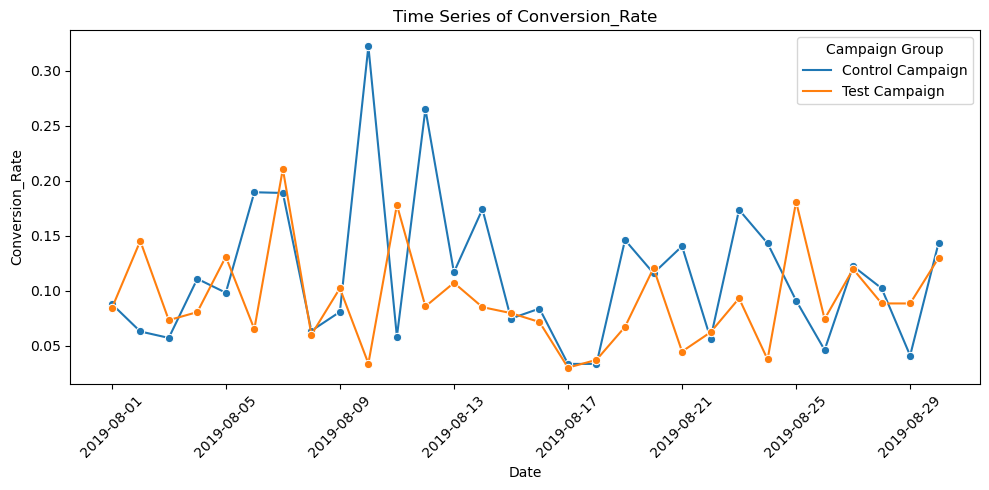

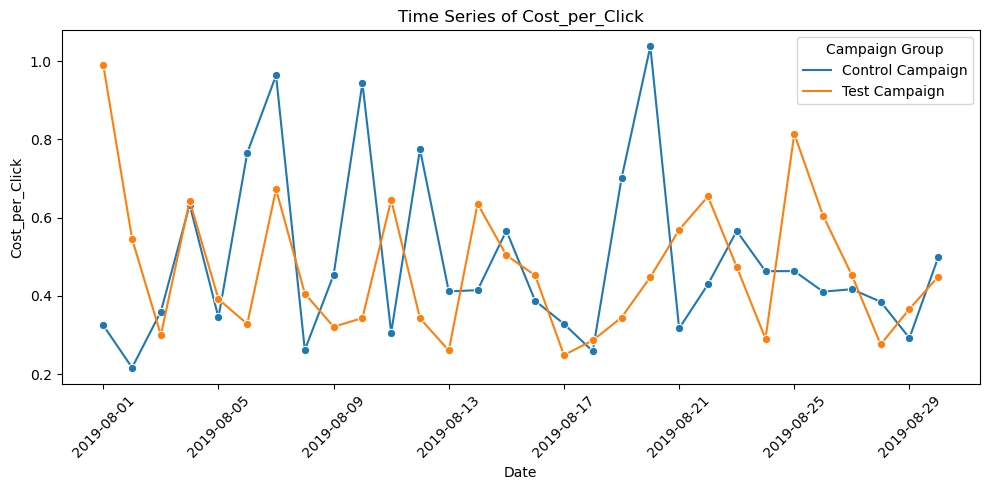

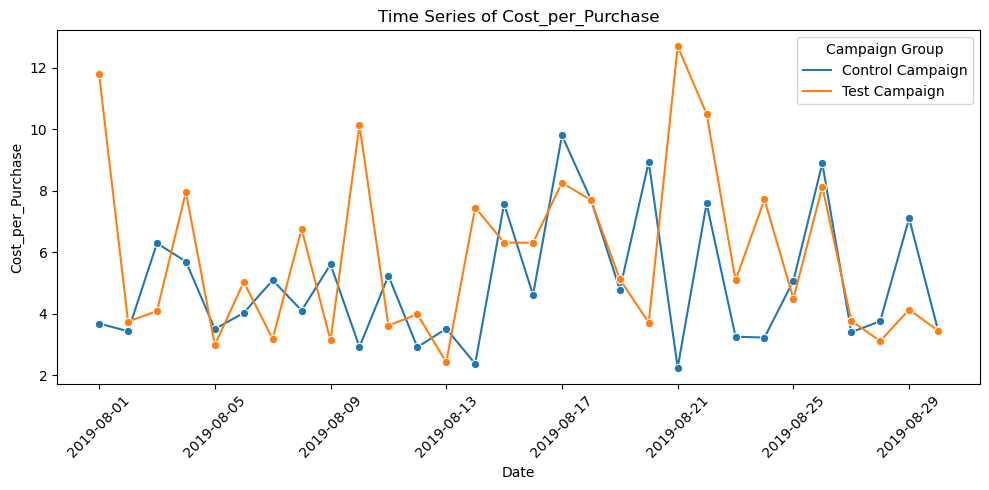

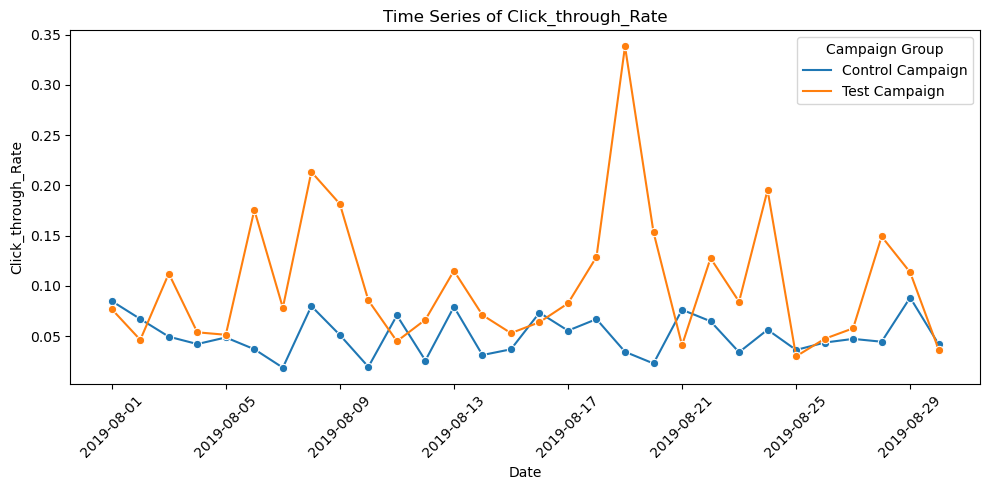

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create time series plots
for metric in new_metrics:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=combined_df2, x='Date', y=metric, hue='Campaign Name', marker='o')
    plt.title(f"Time Series of {metric}")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.legend(title='Campaign Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

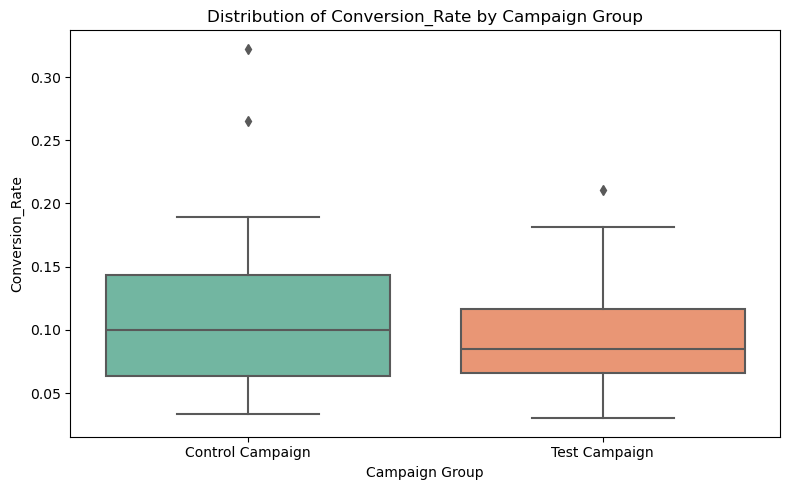

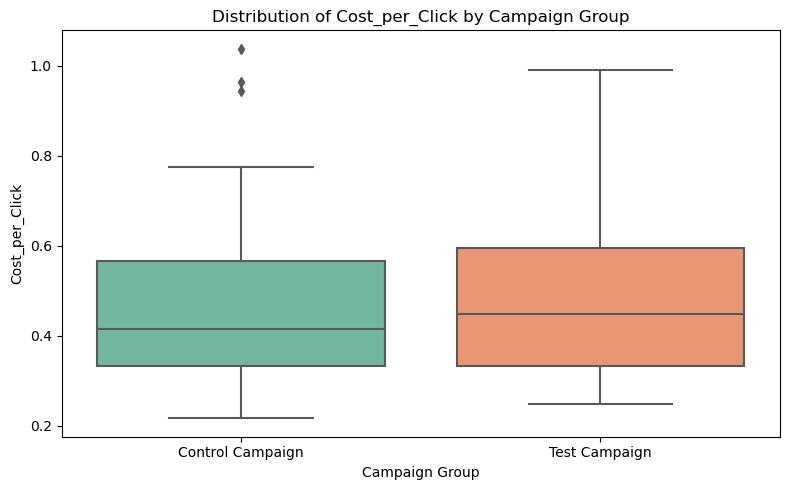

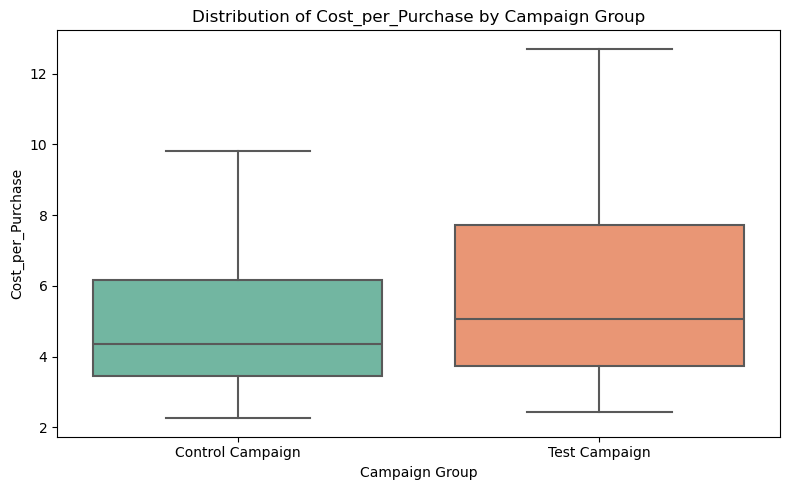

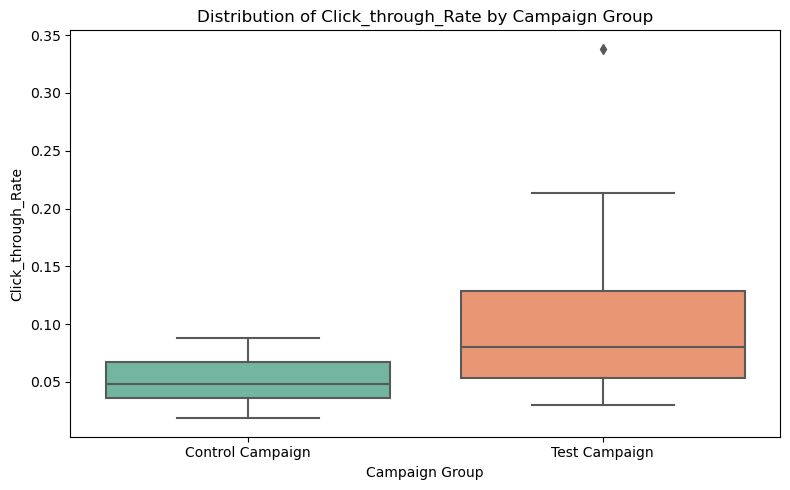

In [47]:
# Create box plots for each metric grouped by campaign name
for metric in new_metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined_df2, x='Campaign Name', y=metric, palette='Set2')
    plt.title(f"Distribution of {metric} by Campaign Group")
    plt.xlabel("Campaign Group")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


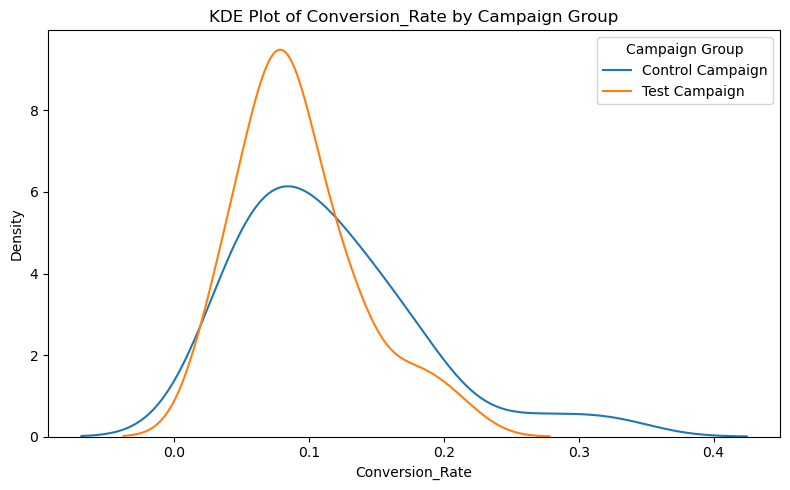

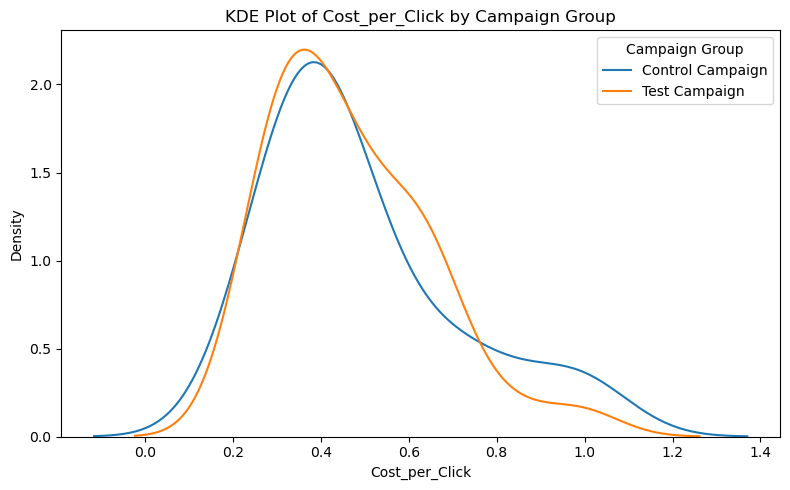

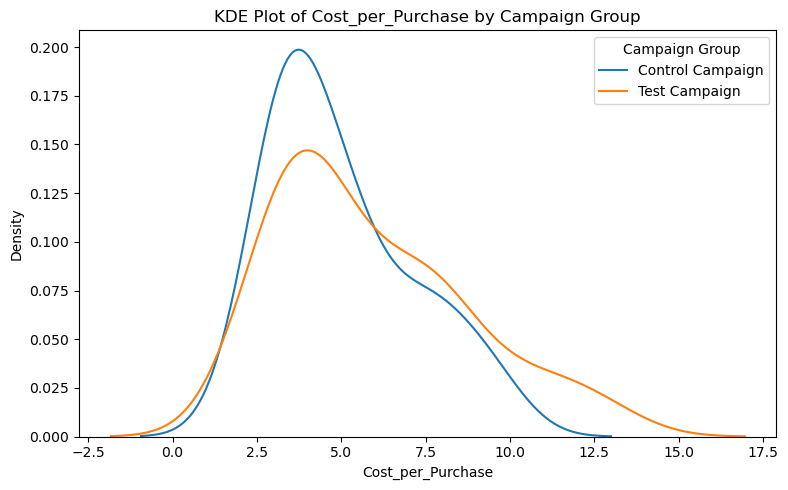

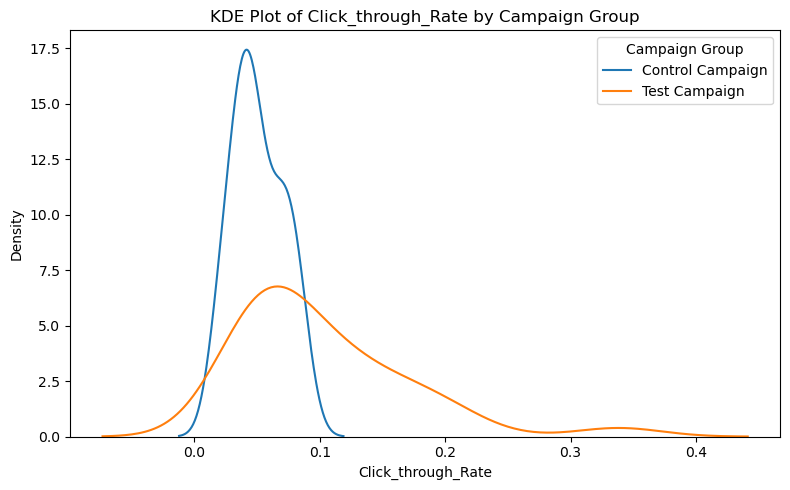

In [48]:
# Fix legend labels manually in KDE plots
for metric in new_metrics:
    plt.figure(figsize=(8, 5))
    plot_data = combined_df2[[metric, 'Campaign Name']].dropna()

    # Get unique campaign names for plotting and labeling
    for campaign in plot_data['Campaign Name'].unique():
        subset = plot_data[plot_data['Campaign Name'] == campaign]
        sns.kdeplot(data=subset, x=metric, label=campaign, fill=False, common_norm=False)

    plt.title(f"KDE Plot of {metric} by Campaign Group")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend(title='Campaign Group')
    plt.tight_layout()
    plt.show()


In [49]:
for metric in new_metrics:

    print(f'\n{metric}:')
    print(stats.mannwhitneyu(new_control_group[metric], new_test_group[metric]))


Conversion_Rate:
MannwhitneyuResult(statistic=523.0, pvalue=0.2837780479456242)

Cost_per_Click:
MannwhitneyuResult(statistic=461.0, pvalue=0.8766349003139949)

Cost_per_Purchase:
MannwhitneyuResult(statistic=368.0, pvalue=0.22823006680742364)

Click_through_Rate:
MannwhitneyuResult(statistic=199.0, pvalue=0.00021264638274527632)


Conversion_Rate: # of Purchase / # of Website Clicks
Proportion of website visitors who completed a purchase

Cost_per_Click: Spend [USD] / # of Website Clicks
Average cost to generate one website click

Cost_per_Purchase: Spend [USD] / # of Purchase
Average cost to generate one purchase

Click_through_Rate: # of Website Clicks / # of Impressions
Proportion of ad impressions that resulted in a click

-> Click_through_Rate was the statistically significant result. Specifically, the first week and third week of August had some noticeable difference between the control group and the test group